In [1]:
#Install/import packages libraries

from sklearn.metrics import make_scorer, accuracy_score # for accuracy
from sklearn.model_selection import train_test_split # for splitting the train-test data
from sklearn.ensemble import RandomForestClassifier # random forest model
from sklearn import preprocessing # EDA
import seaborn as sns # visualization
import pandas as pd # EDA
import numpy as np # EDA
import sklearn # machine learning
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [2]:
# code to see the output of multiple lines of codes

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [3]:
# Read the titanic dataset

titanic = pd.read_csv('C:\\Users\\Anju\\Desktop\\Data science misc\\Hand on Projects\\Titanic - Streamlit\\train.csv')


In [4]:
# survival - Survival (0 = No; 1 = Yes)
# class - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
# name - Name
# sex - Sex
# age - Age
# sibsp - Number of Siblings/Spouses Aboard
# parch - Number of Parents/Children Aboard
# ticket - Ticket Number
# fare - Passenger Fare
# cabin - Cabin
# embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)


# EDA and Feature engineering.

In [5]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
titanic.isnull().sum()    #Find the missing values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
# impute the missing data

titanic.Embarked = titanic.Embarked.fillna('OTHR')

titanic.Cabin = titanic.Cabin.fillna('OTHR')

titanic.Age = titanic.Age.fillna(29.8)


In [9]:
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [10]:
for col in ['Sex', 'Embarked','Cabin']:
    print( col,':')
    print(titanic[col].value_counts())

Sex :
male      577
female    314
Name: Sex, dtype: int64
Embarked :
S       644
C       168
Q        77
OTHR      2
Name: Embarked, dtype: int64
Cabin :
OTHR           687
C23 C25 C27      4
B96 B98          4
G6               4
F2               3
              ... 
E63              1
C110             1
C99              1
F G63            1
B73              1
Name: Cabin, Length: 148, dtype: int64


In [11]:
titanic.isnull().sum()    #  No more missing values found after imputation.

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

# EDA on survival rate

Text(0.5, 1.0, 'Survival rate')

Text(0.0, 554, '61.62%')

Text(1.0, 347, '38.38%')

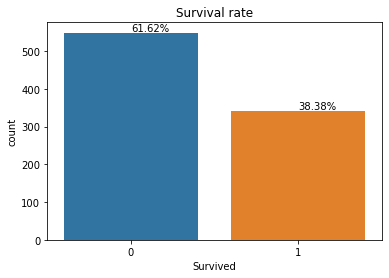

In [12]:
# Around 38% of those onboard on the titanic survived.
# 1 - Survived.
# 0 - Not Survive.

total = float(len(titanic))
plt.title('Survival rate')
ax = sns.countplot(x="Survived", data=titanic)
for i in ax.patches:
    height = i.get_height()
    ax.text(i.get_x()+i.get_width()/2.,height + 5,
           '{:1.2f}'.format(height/total*100) + '%')

# EDA on Sex ratio and Corressponding survival rate.

Text(0.5, 1.0, 'Sex rate')

Text(0.0, 582, '64.76%')

Text(1.0, 319, '35.24%')

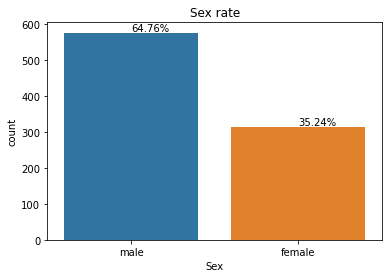

In [13]:
# Around 65% of those onboard on the titanic were male and 35.24% were female.

total = float(len(titanic))
plt.title('Sex rate')
ax = sns.countplot(x="Sex", data=titanic)
for i in ax.patches:
    height = i.get_height()
    ax.text(i.get_x()+i.get_width()/2.,height + 5,
           '{:1.2f}'.format(height/total*100) + '%')

<Figure size 576x432 with 0 Axes>

Text(0.5, 1.0, 'Survival rate based on Sex')

Text(-0.2, 473, '52.53%')

Text(0.8, 86, '9.09%')

Text(0.2, 114, '12.23%')

Text(1.2, 238, '26.15%')

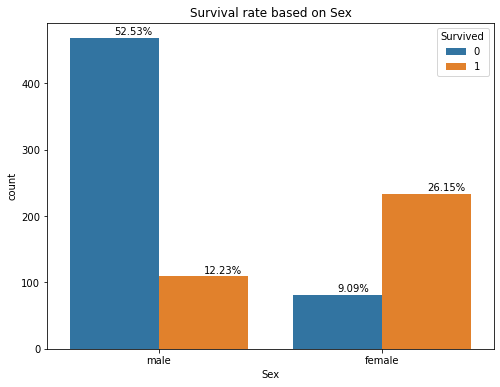

In [14]:
# 0 - Not survived - blue colour 
# 1 - Survived-  yellow colour.
# From below plot, we can infer that only 12% out of a total of 65% male population survived 
# and 26% out of 35% of female population survived.
# Looks like female survival rate was better.

plt.figure(figsize=(8,6))
plt.title('Survival rate based on Sex')
total = float(len(titanic))
ax = sns.countplot(x="Sex", data=titanic, hue = 'Survived')
for i in ax.patches:
    height = i.get_height()
    ax.text(i.get_x()+i.get_width()/2.,height + 5,
           '{:1.2f}'.format(height/total*100) + '%')

# EDA on Pclass category and corressponding survival rate.¶

Text(0.5, 1.0, 'Pclass')

Text(0.0, 221, '24.24%')

Text(1.0, 189, '20.65%')

Text(2.0, 496, '55.11%')

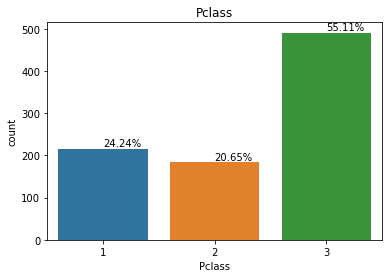

In [15]:
# Around 24% of those onboard on the titanic belonged to Pclass 1.
# Around 21% of those onboard on the titanic belonged to Pclass 2.
# Around 55% of those onboard on the titanic belonged to Pclass 3.

total = float(len(titanic))
plt.title('Pclass')
ax = sns.countplot(x="Pclass", data=titanic)
for i in ax.patches:
    height = i.get_height()
    ax.text(i.get_x()+i.get_width()/2.,height + 5,
           '{:1.2f}'.format(height/total*100) + '%')

<Figure size 576x432 with 0 Axes>

Text(0.5, 1.0, 'Survival rate based on Pclass')

Text(-0.2, 85, '8.98%')

Text(0.8, 102, '10.89%')

Text(1.8, 377, '41.75%')

Text(0.2, 141, '15.26%')

Text(1.2, 92, '9.76%')

Text(2.2, 124, '13.36%')

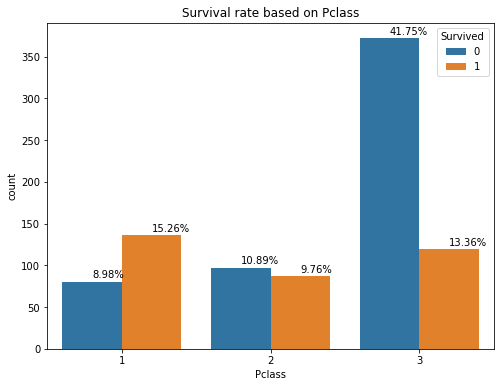

In [16]:
# 0 - Not survived - blue colour 
# 1 - Survived-  yellow colour.
# Highest number of population onboard the titanic travelled in 3rd class but survival rate is very less compared to 
# the other two classes.
# Percentage of survival rate is better for people travelling in 1st class and 2nd class.
# Survival rate of people belonging to first class outnumbered the non survival rate. 

plt.figure(figsize=(8,6))
plt.title('Survival rate based on Pclass')
total = float(len(titanic))
ax = sns.countplot(x="Pclass", data=titanic, hue = 'Survived')
for i in ax.patches:
    height = i.get_height()
    ax.text(i.get_x()+i.get_width()/2.,height + 5,
           '{:1.2f}'.format(height/total*100) + '%')

# EDA on Embarked ( Place of boarding the ship) and the corressponding survival rates.¶


Text(0.5, 1.0, 'Percentage and count of people boarding the ship from a particular location')

Text(0.0, 649, '72.28%')

Text(1.0, 173, '18.86%')

Text(2.0, 82, '8.64%')

Text(3.0, 7, '0.22%')

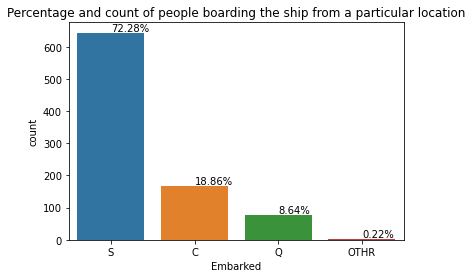

In [17]:
# Embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

# 72% of the total population onboard the titanic boarded from place of embark 'Southampton'.
# Almost 19% of the total population onboard the titanic boarded from place of embark 'Cherbourg'.
# Almost 9% of the total population onboard the titanic boarded from place of embark 'Queenstown'.
# And a negligible 0.22% of the population boarded from unknown location.

total = float(len(titanic))
plt.title('Percentage and count of people boarding the ship from a particular location')
ax = sns.countplot(x="Embarked", data=titanic)
for i in ax.patches:
    height = i.get_height()
    ax.text(i.get_x()+i.get_width()/2.,height + 5,
           '{:1.2f}'.format(height/total*100) + '%')
    

<Figure size 576x432 with 0 Axes>

Text(0.5, 1.0, 'Survival rate based on Place of Embark')

Text(-0.2, 432.0, '47.92%')

Text(0.8, 80.0, '8.42%')

Text(1.8, 52.0, '5.27%')

Text(2.8, nan, 'nan%')

Text(0.2, 222.0, '24.35%')

Text(1.2, 98.0, '10.44%')

Text(2.2, 35.0, '3.37%')

Text(3.2, 7.0, '0.22%')

posx and posy should be finite values
posx and posy should be finite values


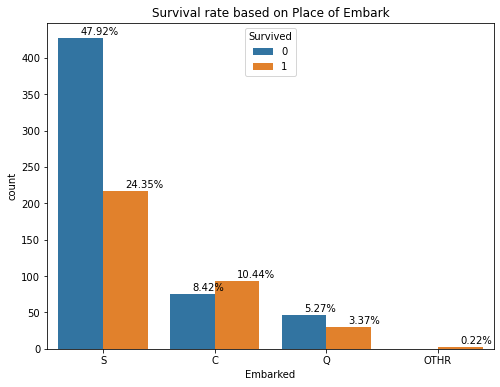

In [18]:
# 0 - Not survived - blue colour 
# 1 - Survived-  yellow colour.
# People boarding the titanic from place of Embark 'Cherbourg' has a better survival rate.
# Survival rate of people boarding from  place of Embark 'Southampton' has almost a 50% survival- non survival rate.

plt.figure(figsize=(8,6))
plt.title('Survival rate based on Place of Embark')
total = float(len(titanic))
ax = sns.countplot(x="Embarked", data=titanic, hue = 'Survived')
for i in ax.patches:
    height = i.get_height()
    ax.text(i.get_x()+i.get_width()/2.,height + 5,
           '{:1.2f}'.format(height/total*100) + '%')

# EDA on Cabin  and the corressponding survival rates.¶


<Figure size 1080x432 with 0 Axes>

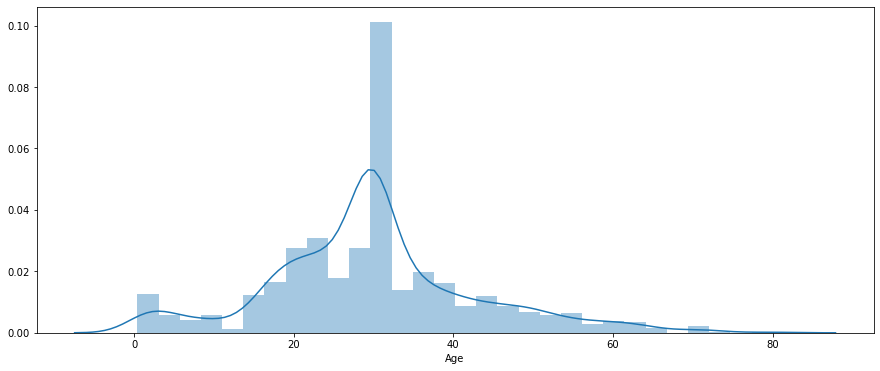

In [19]:
# We can see that maximum populated onboard the train are aged between 20-40.

plt.figure(figsize=(15,6))
sns.distplot(titanic['Age'])
plt.show()

<Figure size 1080x432 with 0 Axes>

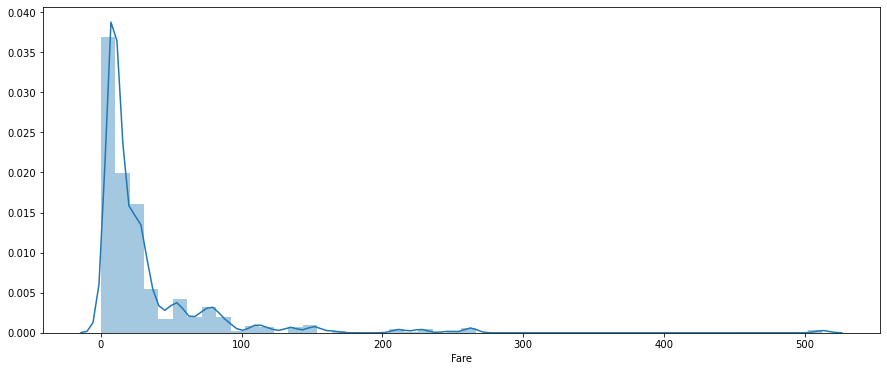

In [20]:
# Distribution of Fare.
# MAximum population paid a lesser amount of fare.

plt.figure(figsize=(15,6))
sns.distplot(titanic['Fare'])
plt.show()

Text(0.5, 1.0, 'Boxen Plot')

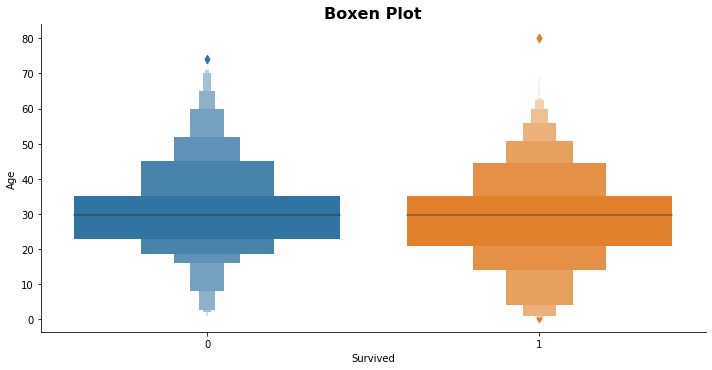

In [21]:
# Survival rate is higher in the age range of 20-35 years. 
# Mortality rate is higher with increase of age.

sns.catplot(x='Survived', y='Age', data=titanic, kind='boxen', aspect=2)
plt.title('Boxen Plot', weight='bold', fontsize=16)
plt.show()

Text(0.5, 1.0, 'Boxen Plot')

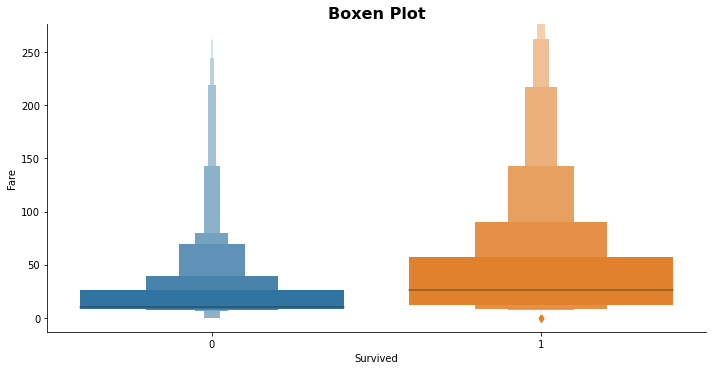

In [22]:
# Higher the fare, more the survival rate.

sns.catplot(x='Survived', y='Fare', data=titanic, kind='boxen', aspect=2)
plt.title('Boxen Plot', weight='bold', fontsize=16)
plt.show()

<Figure size 1800x360 with 0 Axes>

Text(0.5, 1.0, 'Survival rate based on fare')

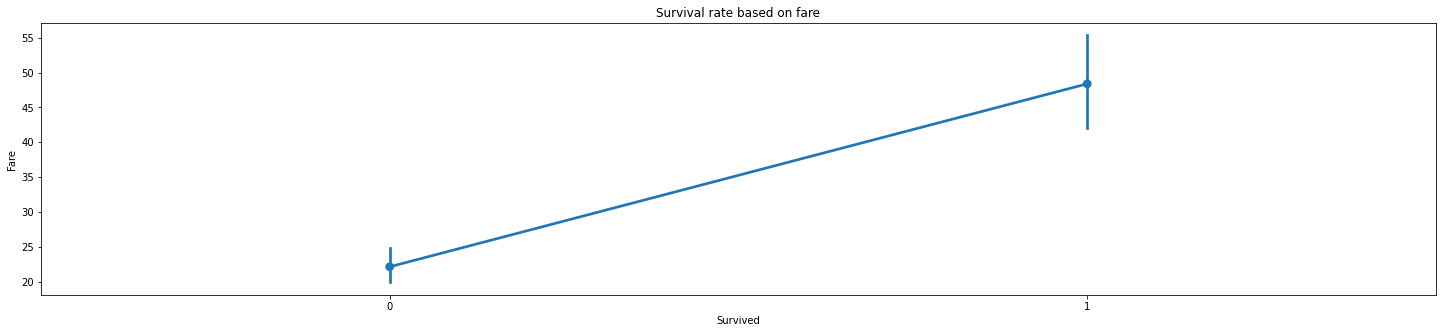

In [23]:
# Survival rate is increasing with increase in fare price.

plt.figure(figsize=(25, 5))
plt.title('Survival rate based on fare')
sns.pointplot(x='Survived', y='Fare', data=titanic)


<Figure size 1800x360 with 0 Axes>

Text(0.5, 1.0, 'Survival rate based on age')

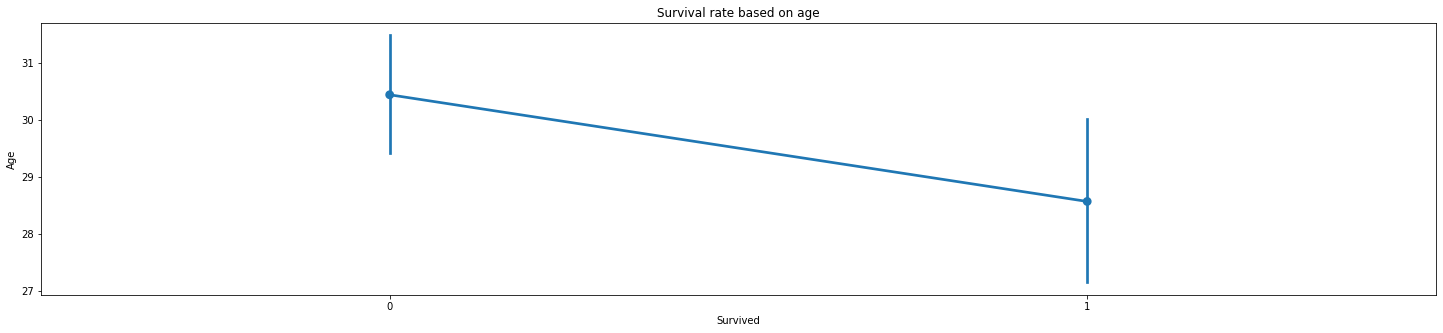

In [24]:
# Survival rate is decreasing with increase in age.
# More young people have survived.

plt.figure(figsize=(25, 5))
plt.title('Survival rate based on age')
sns.pointplot(x='Survived', y='Age', data=titanic)


<Figure size 1800x360 with 0 Axes>

Text(0.5, 1.0, 'Survival rate based on age and fare')

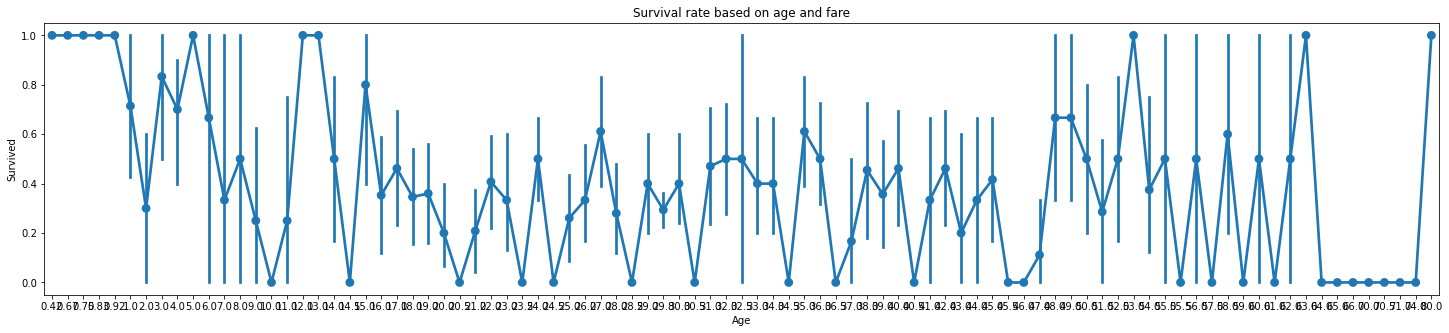

In [25]:
# Survival rate is decreasing with age.

plt.figure(figsize=(25, 5))
plt.title('Survival rate based on age and fare')
sns.pointplot(x='Age', y ='Survived', data=titanic)


C:\Users\Anju\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


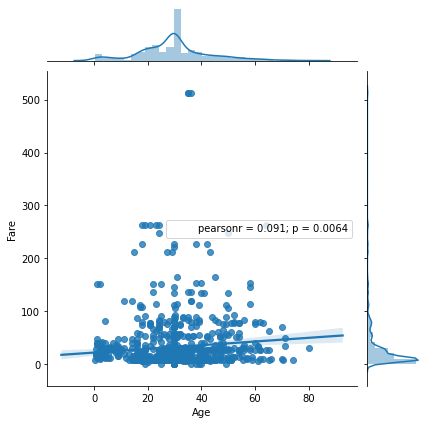

In [26]:
# From below plot, we can see that with increase in age, fare price is also increasing.

from scipy import stats
g = sns.JointGrid(titanic['Age'],titanic['Fare'])
g = g.plot(sns.regplot, sns.distplot)
g = g.annotate(stats.pearsonr)


In [27]:

# label endcoding for the object datatypes 

for col in ['Sex','Cabin','Embarked']:
    ltrain = preprocessing.LabelEncoder()
    ltrain = ltrain.fit(titanic[col])
    titanic[col] = ltrain.transform(titanic[col])
    

In [28]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,146,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,81,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,146,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,55,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,146,3


In [29]:
titanic.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,1.000000,-0.005007,-0.035144,0.042939,0.033144,-0.057527,-0.001652,0.012658,-0.035197,0.009305
Survived,-0.005007,1.000000,-0.338481,-0.543351,-0.070094,-0.035322,0.081629,0.257307,-0.253658,-0.174963
Pclass,-0.035144,-0.338481,1.000000,0.131900,-0.330802,0.083081,0.018443,-0.549500,0.682176,0.197493
Sex,0.042939,-0.543351,0.131900,1.000000,0.084324,-0.114631,-0.245489,-0.182333,0.095991,0.106395
Age,0.033144,-0.070094,-0.330802,0.084324,1.000000,-0.232565,-0.179574,0.091254,-0.234571,-0.035232
SibSp,-0.057527,-0.035322,0.083081,-0.114631,-0.232565,1.000000,0.414838,0.159651,0.043525,0.068043
Parch,-0.001652,0.081629,0.018443,-0.245489,-0.179574,0.414838,1.000000,0.216225,-0.028179,0.032517
Fare,0.012658,0.257307,-0.549500,-0.182333,0.091254,0.159651,0.216225,1.000000,-0.502569,-0.246359
Cabin,-0.035197,-0.253658,0.682176,0.095991,-0.234571,0.043525,-0.028179,-0.502569,1.000000,0.232192
Embarked,0.009305,-0.174963,0.197493,0.106395,-0.035232,0.068043,0.032517,-0.246359,0.232192,1.000000


In [30]:
# Choosing the features on which I want to predict the survival rate.

titanic_input = titanic[['Age', 'Fare', 'Pclass','Sex','Embarked']]
titanic_target = titanic[['Survived']]


In [31]:
# split the dataset into train/test

x_train, x_test, y_train, y_test = train_test_split(titanic_input, titanic_target, test_size = 0.3, random_state=100)


# Build models

# 1.Logistic regression model

In [32]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression
log = LogisticRegression(random_state=0, solver='lbfgs') 
log.fit(x_train, y_train)

y_pred = log.predict(x_test)

from sklearn.metrics import precision_score, accuracy_score
x_actual, x_pred = y_train, log.predict(x_train)
precision_score_LG_train = precision_score(x_actual, x_pred)
accuracy_score_LG_train = accuracy_score(x_actual, x_pred)
print('precision of single logistic regression classifier on the train set:',round(precision_score_LG_train * 100,2), '%')
print('accuracy of single logistic regression classifier on the train set: ',round(accuracy_score_LG_train * 100,2), '%')

from sklearn.metrics import precision_score, accuracy_score
y_actual, y_pred = y_test, log.predict(x_test)
precision_score_LG_test = precision_score(y_actual, y_pred)
accuracy_score_LG_test = accuracy_score(y_actual, y_pred)
print('precision of single logistic regression classifier on the test set:',round(precision_score_LG_test * 100,2), '%')
print('accuracy of single logistic regression classifier on the test set: ',round(accuracy_score_LG_test * 100,2), '%')




C:\Users\Anju\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression(random_state=0)

precision of single logistic regression classifier on the train set: 72.53 %
accuracy of single logistic regression classifier on the train set:  79.45 %
precision of single logistic regression classifier on the test set: 77.08 %
accuracy of single logistic regression classifier on the test set:  78.73 %


(<Figure size 576x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1df86583c08>)

Text(0.5, 0, 'False positive rate')

Text(0, 0.5, 'True positive rate')

(0.0, 1.0)

(0.0, 1.0)

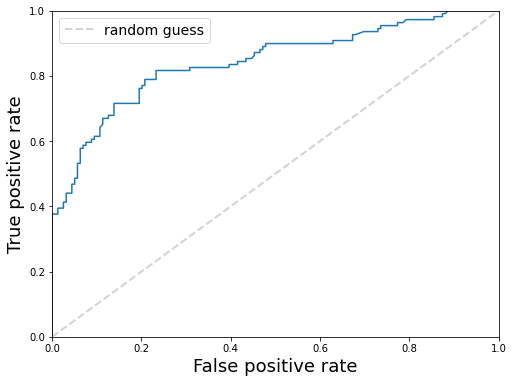

single Logistic regression AUC is:  84.29 %


In [33]:
logauc = log.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, logauc)

plt.subplots(figsize=(8,6))
plt.plot(fpr, tpr)
x = np.linspace(0,1,num=50)
plt.plot(x,x,color='lightgrey',linestyle='--',marker='',lw=2,label='random guess')
plt.legend(fontsize = 14)
plt.xlabel('False positive rate', fontsize = 18)
plt.ylabel('True positive rate', fontsize = 18)
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()

AUC_logsin = auc(fpr,tpr)
print('single Logistic regression AUC is: ', round(AUC_logsin *100,2),'%')

# 2. Decision tree classifier

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7],
                         'max_features': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
                         'min_samples_leaf': [1, 10, 100],
                         'random_state': [14]},
             scoring='roc_auc')

The best parameters are:  {'max_depth': 4, 'max_features': 0.6, 'min_samples_leaf': 1, 'random_state': 14}
best mean cross-validated score (auc) :  0.8592999122370074
The precision score of decision tree on TRAIN is :  82.04 %
The accuracy score of decision tree on TRAIN is :  83.79 %
The precision score of decision tree on TEST is :  77.42 %
The accuracy score of decision tree on TEST is :  78.36 %


(<Figure size 576x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1df879406c8>)

Text(0.5, 0, 'False positive rate')

Text(0, 0.5, 'True positive rate')

(0.0, 1.0)

(0.0, 1.0)

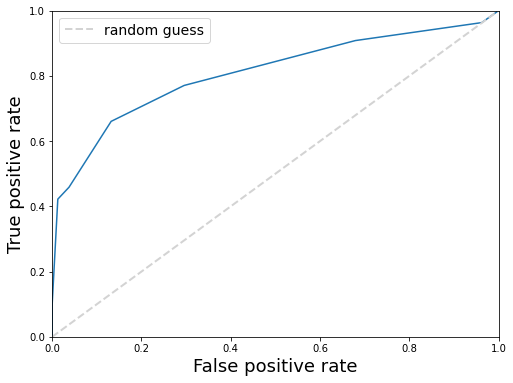

DT AUC is:  80.81 %
Confusion Matrix TRAIN:
 [[353  37]
 [ 64 169]]

Confusion Matrix TEST:
 [[138  21]
 [ 37  72]]
Classification Report TRAIN:
               precision    recall  f1-score   support

           0       0.85      0.91      0.87       390
           1       0.82      0.73      0.77       233

    accuracy                           0.84       623
   macro avg       0.83      0.82      0.82       623
weighted avg       0.84      0.84      0.84       623


Classification Report TEST:
               precision    recall  f1-score   support

           0       0.79      0.87      0.83       159
           1       0.77      0.66      0.71       109

    accuracy                           0.78       268
   macro avg       0.78      0.76      0.77       268
weighted avg       0.78      0.78      0.78       268



In [34]:
# Decision tree classifier with grid seacrh CV and model evaluation using accuracy score, precision score and AUC/ROC curve.

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

parameters = {'max_features': [0.5,0.6,0.7,0.8,0.9,1.0], 'max_depth': [2,3,4,5,6,7],'min_samples_leaf':[1,10,100],'random_state':[14]} 

clf = GridSearchCV(DecisionTreeClassifier(), parameters, cv=5, scoring='roc_auc')
clf.fit(x_train, y_train)

print('The best parameters are: ', clf.best_params_)
print('best mean cross-validated score (auc) : ', clf.best_score_)

from sklearn.metrics import precision_score, accuracy_score
x_actual, x_pred = y_train, clf.predict(x_train)
precision_score_DT_train = precision_score(x_actual, x_pred)
accuracy_score_DT_train = accuracy_score(x_actual, x_pred)
print('The precision score of decision tree on TRAIN is : ',round(precision_score_DT_train * 100,2), '%')
print('The accuracy score of decision tree on TRAIN is : ',round(accuracy_score_DT_train * 100,2), '%')

from sklearn.metrics import precision_score, accuracy_score
y_actual, y_pred = y_test, clf.predict(x_test)
precision_score_DT_test =  precision_score(y_actual, y_pred)
accuracy_score_DT_test = accuracy_score(y_actual, y_pred)
print('The precision score of decision tree on TEST is : ',round(precision_score_DT_test * 100,2), '%')
print('The accuracy score of decision tree on TEST is : ',round(accuracy_score_DT_test * 100,2), '%')

#Now let's plot the ROC curve and calculate AUC on the test set
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
adsu = clf.predict_proba(x_test)[:,1]
plt.subplots(figsize=(8,6))
fpr, tpr, thresholds = roc_curve(y_test, adsu)
plt.plot(fpr, tpr)
x = np.linspace(0,1,num=50)
plt.plot(x,x,color='lightgrey',linestyle='--',marker='',lw=2,label='random guess')
plt.legend(fontsize = 14)
plt.xlabel('False positive rate', fontsize = 18)
plt.ylabel('True positive rate', fontsize = 18)
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()

AUC_DT = auc(fpr,tpr)
print('DT AUC is: ', round(AUC_DT * 100,2), '%')

#getting the confusion matrix for the classification model
from sklearn.metrics import confusion_matrix # cofusion matrix / accuracy
print ('Confusion Matrix TRAIN:\n', confusion_matrix(y_train,x_pred))
print ('\nConfusion Matrix TEST:\n', confusion_matrix(y_test,y_pred))

# getting the classification report of the classification models
from sklearn.metrics import classification_report 
print ('Classification Report TRAIN:\n', classification_report(y_train,x_pred))
print ('\nClassification Report TEST:\n', classification_report(y_test,y_pred))

# 3. Random Forest Classifier

C:\Users\Anju\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Anju\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Anju\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Anju\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was pa

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 7],
                         'max_features': [0.5, 0.7, 0.9],
                         'min_samples_leaf': [1, 10], 'n_estimators': [700],
                         'n_jobs': [-1], 'random_state': [14]},
             scoring='roc_auc')

The best parameters are:  {'max_depth': 3, 'max_features': 0.9, 'min_samples_leaf': 1, 'n_estimators': 700, 'n_jobs': -1, 'random_state': 14}
best mean cross-validated score (auc) :  0.8643504352570032
The precision score of random forest on TRAIN is :  83.92 %
The accuracy score of random forest on TRAIN is :  84.27 %
The precision score of random forest on TEST is :  82.76 %
The accuracy score of random forest on TEST is :  80.6 %


(<Figure size 576x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1df86591a88>)

Text(0.5, 0, 'False positive rate')

Text(0, 0.5, 'True positive rate')

(0.0, 1.0)

(0.0, 1.0)

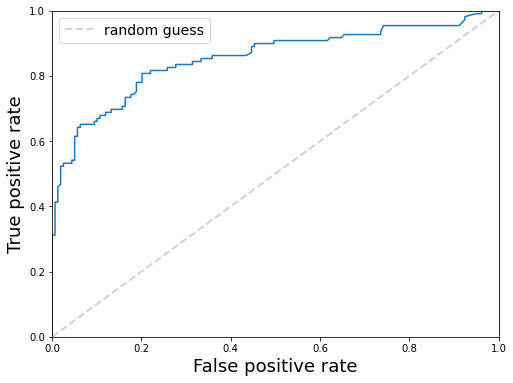

RF AUC is:  85.42 %
Confusion Matrix TRAIN:
 [[358  32]
 [ 66 167]]

Confusion Matrix TEST:
 [[144  15]
 [ 37  72]]
Classification Report TRAIN:
               precision    recall  f1-score   support

           0       0.84      0.92      0.88       390
           1       0.84      0.72      0.77       233

    accuracy                           0.84       623
   macro avg       0.84      0.82      0.83       623
weighted avg       0.84      0.84      0.84       623


Classification Report TEST:
               precision    recall  f1-score   support

           0       0.80      0.91      0.85       159
           1       0.83      0.66      0.73       109

    accuracy                           0.81       268
   macro avg       0.81      0.78      0.79       268
weighted avg       0.81      0.81      0.80       268



In [35]:

from sklearn.ensemble import RandomForestClassifier
parameters = {'n_estimators':[700],'n_jobs':[-1], 'max_features': [0.5,0.7,0.9], 'max_depth': [3,5,7],'min_samples_leaf':[1,10],'random_state':[14]} 

clf1 = GridSearchCV(RandomForestClassifier(), parameters, cv=5, scoring='roc_auc')
clf1.fit(x_train, y_train)

print('The best parameters are: ', clf1.best_params_)
print('best mean cross-validated score (auc) : ', clf1.best_score_)

from sklearn.metrics import precision_score, accuracy_score
x_actual, x_pred = y_train, clf1.predict(x_train)
precision_score_RF_train = precision_score(x_actual, x_pred)
accuracy_score_RF_train = accuracy_score(x_actual, x_pred)
print('The precision score of random forest on TRAIN is : ',round(precision_score_RF_train * 100,2), '%')
print('The accuracy score of random forest on TRAIN is : ',round(accuracy_score_RF_train * 100,2), '%')

from sklearn.metrics import precision_score, accuracy_score
y_actual, y_pred = y_test, clf1.predict(x_test)
precision_score_RF_test =  precision_score(y_actual, y_pred)
accuracy_score_RF_test = accuracy_score(y_actual, y_pred)
print('The precision score of random forest on TEST is : ',round(precision_score_RF_test * 100,2), '%')
print('The accuracy score of random forest on TEST is : ',round(accuracy_score_RF_test * 100,2), '%')

#Now let's plot the ROC curve and calculate AUC on the test set
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
adsu = clf1.predict_proba(x_test)[:,1]
plt.subplots(figsize=(8,6))
fpr, tpr, thresholds = roc_curve(y_test, adsu)
plt.plot(fpr, tpr)
x = np.linspace(0,1,num=50)
plt.plot(x,x,color='lightgrey',linestyle='--',marker='',lw=2,label='random guess')
plt.legend(fontsize = 14)
plt.xlabel('False positive rate', fontsize = 18)
plt.ylabel('True positive rate', fontsize = 18)
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()

AUC_RF = auc(fpr,tpr)
print('RF AUC is: ', round(AUC_RF * 100,2), '%')

#getting the confusion matrix for the classification model
from sklearn.metrics import confusion_matrix # cofusion matrix / accuracy
print ('Confusion Matrix TRAIN:\n', confusion_matrix(y_train,x_pred))
print ('\nConfusion Matrix TEST:\n', confusion_matrix(y_test,y_pred))

# getting the classification report of the classification models
from sklearn.metrics import classification_report 
print ('Classification Report TRAIN:\n', classification_report(y_train,x_pred))
print ('\nClassification Report TEST:\n', classification_report(y_test,y_pred))

In [40]:
print('The ACCURACY SCORE of various models on train and test are:')
print('The accuracy score of logistic regression classifier on: \t\t\tTRAIN:',round(accuracy_score_LG_train * 100,2), '\b%','\tTEST:',round(accuracy_score_LG_test * 100,2), '\b%')
print('The accuracy score of decision tree on : \t\t\t\t\tTRAIN:',round(accuracy_score_DT_train * 100,2), '\b%','\tTEST:',round(accuracy_score_DT_test * 100,2), '\b%')
print('The accuracy score of random forest ensembler on: \t\t\t\tTRAIN:',round(accuracy_score_RF_train * 100,2), '\b%','\tTEST:',round(accuracy_score_RF_test * 100,2), '\b%')
print('                                                         ')

print('The PRECISION SCORE of various models on train and test are:')
print('The precision score of Logistic regression classifier on: \t\t\tTRAIN:',round(precision_score_LG_train * 100,2), '\b%','\tTEST:',round(precision_score_LG_test * 100,2), '\b%')
print('The precision score of decision tree on : \t\t\t\t\tTRAIN:',round(precision_score_DT_train * 100,2), '\b%','\tTEST:',round(precision_score_DT_test * 100,2), '\b%')
print('The precision score of random forest ensembler on: \t\t\t\tTRAIN:',round(precision_score_RF_train * 100,2), '\b%','\tTEST:',round(precision_score_RF_test * 100,2), '\b%')
print('                                                         ')

print('The AUC SCORE of various models on test are:')
print('The AUC score of single logistic regreesion classifier on: \t\t\tTest:',round(AUC_logsin * 100,2), '%', '\b%')
print('The AUC score of decision tree on : \t\t\t\t\t\tTest:',round(AUC_DT * 100,2), '%', '\b%')
print('The AUC score of random forest ensembler on: \t\t\t\t\tTest:',round(AUC_RF * 100,2), '%', '\b%')


The ACCURACY SCORE of various models on train and test are:
The accuracy score of logistic regression classifier on: 			TRAIN: 79.45 % 	TEST: 78.73 %
The accuracy score of decision tree on : 					TRAIN: 83.79 % 	TEST: 78.36 %
The accuracy score of random forest ensembler on: 				TRAIN: 84.27 % 	TEST: 80.6 %
                                                         
The PRECISION SCORE of various models on train and test are:
The precision score of Logistic regression classifier on: 			TRAIN: 72.53 % 	TEST: 77.08 %
The precision score of decision tree on : 					TRAIN: 82.04 % 	TEST: 77.42 %
The precision score of random forest ensembler on: 				TRAIN: 83.92 % 	TEST: 82.76 %
                                                         
The AUC SCORE of various models on test are:
The AUC score of single logistic regreesion classifier on: 			Test: 84.29 % %
The AUC score of decision tree on : 						Test: 80.81 % %
The AUC score of random forest ensembler on: 					Test: 85.42 % %

# Since random forest  model performed the best, we will deploy random forest model to predict the survival rate.

# Streamlit

In [39]:
import streamlit as st
import pickle

# save the model
filename = 'Streamlit_Titanic.pkl'
pickle.dump(clf1, open(filename,'wb'))

# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(x_test, y_test)
print(result)


0.8542496105244937


In [38]:
# Now we will use another notebook named 'Predict survival rate - titanic(streamlit)' 
# to build the app to predict the survival rate of passengers using streamlit  and again save the notebook in 
# C folder with name 'streamlitpredictsurvivalrate'